In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-05-08 13:20:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   143MB/s    in 0.5s    

2022-05-08 13:20:25 (143 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [5]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

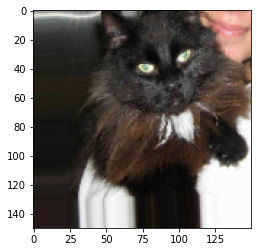

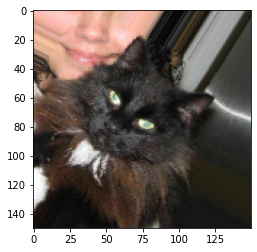

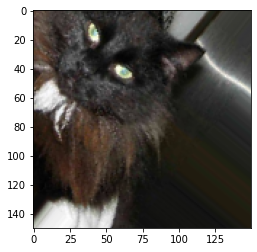

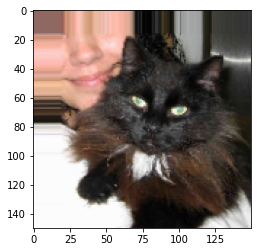

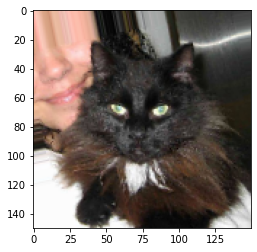

In [6]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

img_width = 150
img_height = 150

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 20,
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 20,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     Dropout(0.2),
     
     Dense(128, activation = 'relu'),
     Dense(3, activation = 'softmax')
    ]
)

In [19]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 3,
    verbose = 1,
    mode = 'auto'
)

In [8]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 3,
    verbose = 1,
    mode = 'auto'
)

In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=85,
      epochs=35,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/35
85/85 - 56s - loss: 0.4858 - acc: 0.7771 - val_loss: 0.4543 - val_acc: 0.7900 - 56s/epoch - 663ms/step
Epoch 2/35
85/85 - 56s - loss: 0.4756 - acc: 0.7841 - val_loss: 0.4581 - val_acc: 0.7860 - 56s/epoch - 662ms/step
Epoch 3/35
85/85 - 57s - loss: 0.4810 - acc: 0.7829 - val_loss: 0.4818 - val_acc: 0.8010 - 57s/epoch - 670ms/step
Epoch 4/35
85/85 - 56s - loss: 0.4650 - acc: 0.7876 - val_loss: 0.5892 - val_acc: 0.7180 - 56s/epoch - 664ms/step
Epoch 5/35
85/85 - 56s - loss: 0.4896 - acc: 0.7765 - val_loss: 0.4414 - val_acc: 0.7990 - 56s/epoch - 660ms/step
Epoch 6/35
85/85 - 56s - loss: 0.4941 - acc: 0.7659 - val_loss: 0.4446 - val_acc: 0.7860 - 56s/epoch - 659ms/step
Epoch 7/35
85/85 - 56s - loss: 0.4458 - acc: 0.7912 - val_loss: 0.4875 - val_acc: 0.7770 - 56s/epoch - 664ms/step
Epoch 8/35
85/85 - 56s - loss: 0.4844 - acc: 0.7753 - val_loss: 0.5701 - val_acc: 0.7170 - 56s/epoch - 657ms/step
Epoch 9/35
85/85 - 56s - loss: 0.4742 - acc: 0.7665 - val_loss: 0.4834 - val_acc: 0.7940

Text(0.5, 1.0, 'Training and validation loss')

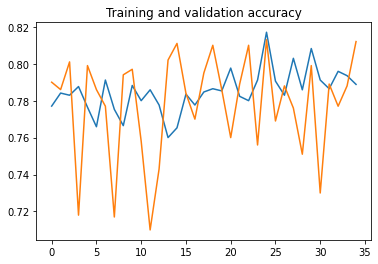

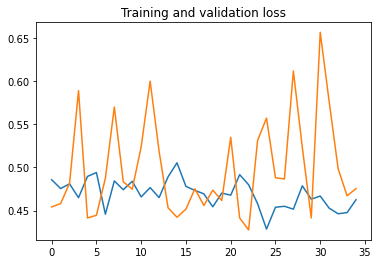

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Saving images.jpg to images (1).jpg
Kategori Gambar : Anjing


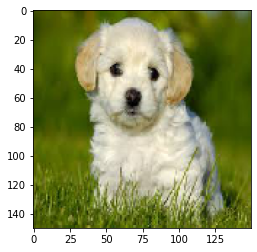

In [33]:
uploaded = files.upload()

for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Membuat numpy vstack array untuk hasil prediksi 
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)

  if classes[0][1] == 1:
    print('Kategori Gambar : Kucing')
  else:
    print('Kategori Gambar : Anjing')